In [39]:
import copy
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from calculator import calculate, load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
c=calculate(c,is_print=True)

purchase_price 5995000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 6016500
down_payment_dollar 1199000
loan_amount 4794500
point_charged_by_lender 0
monthly_line_of_credit_payment 6409
monthly_mortgage_payment 21529
total_cash_needed 1221500
monthly_income 29790
monthly_expenses 49338
monthly_cashflow -19548
net_operating_income 100683
purchase_cap_rate_prct 1.68


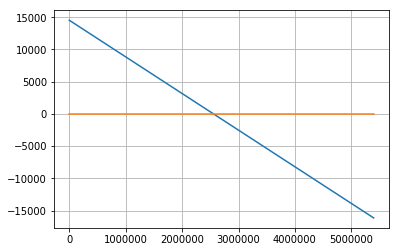

In [41]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
c=calculate(c,is_print=False)
x = []
y = []
for _ in range(300):
    c.purchase_price*= 0.9
    c=calculate(c,is_print=False)
    x.append(c.purchase_price)
    y.append(c.monthly_cashflow)
plt.plot(x,y)
plt.plot([0,np.max(x)],[0,0])
plt.grid(True)

In [42]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
# all cash
del c.line_of_credit
c.down_payment_of_purchase_price = 1
c=calculate(c,is_print=True)

purchase_price 5995000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 6016500
down_payment_dollar 5995000
loan_amount 0
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 0
total_cash_needed 6017500
monthly_income 29790
monthly_expenses 21400
monthly_cashflow 8390
net_operating_income 100682
purchase_cap_rate_prct 1.68


In [43]:
import pandas as pd
import io
import requests
# url = 'https://www.loopnet.com/Listing/1311-19th-St-Santa-Monica-CA/14010784/'
# r = requests.get(url).content
# url = 'https://www.redfin.com/stingray/api/gis-csv?al=1&market=socal&min_stories=1&num_homes=350&ord=redfin-recommended-asc&page_number=1&region_id=37481&region_type=2&sf=1,2,3,5,6,7&sold_within_days=365&status=9&uipt=4&v=8'
# s= requests.get(url).content
fname='redfin_2019-01-01-13-50-07.csv'
fname='redfin_2019-01-01-15-26-05.csv'
df = pd.read_csv(fname)
df.describe()

,SOLD DATE,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,LATITUDE,LONGITUDE
count,0.0,11.0,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.0,0.0,0.0,11.000000,11.000000
mean,NaN,90034.0,3.774086e+06,14.272727,13.636364,10185.454545,10154.181818,1962.000000,177.090909,464.363636,NaN,NaN,NaN,34.028186,-118.401842
std,NaN,0.0,2.864964e+06,13.161238,14.739557,10116.382282,7933.816519,8.729261,238.824812,183.137256,NaN,NaN,NaN,0.007845,0.012455
min,NaN,90034.0,1.199950e+06,4.000000,3.000000,1282.000000,2500.000000,1948.000000,22.000000,290.000000,NaN,NaN,NaN,34.017427,-118.421924
25%,NaN,90034.0,1.950000e+06,6.000000,5.000000,4100.500000,5720.000000,1956.000000,51.000000,368.500000,NaN,NaN,NaN,34.022903,-118.410389
50%,NaN,90034.0,2.585000e+06,11.000000,9.000000,6350.000000,7425.000000,1964.000000,96.000000,411.000000,NaN,NaN,NaN,34.027561,-118.402755
75%,NaN,90034.0,4.795000e+06,15.000000,12.000000,12085.000000,12054.000000,1964.000000,160.500000,483.000000,NaN,NaN,NaN,34.031613,-118.394152
max,NaN,90034.0,9.995000e+06,48.000000,52.000000,34471.000000,30000.000000,1980.000000,827.000000,971.000000,NaN,NaN,NaN,34.041937,-118.380318


In [56]:
df = pd.read_csv(fname)
#plt.scatter(df['PRICE'],df['BEDS'],color='blue')
df = df[df['PRICE']<5000000]
#plt.scatter(df['PRICE'],df['BEDS'],color='red')

In [57]:
src='URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'
tgt='URL'
const = 1000
df=df.rename(index=str, columns={src:tgt})
df['purchase_cap_rate_prct']=None
df['net_operating_income']=None
df['monthly_cashflow']=None
c=load_data('zero_down.yml')
for n,row in df.iterrows():
    c.purchase_price=row['PRICE']
    c.total_gross_monthly_rent=row['BEDS']*const
    c=calculate(c,is_print=False)
    df.loc[n,'purchase_cap_rate_prct']=c.purchase_cap_rate_prct
    df.loc[n,'net_operating_income']=c.net_operating_income
    df.loc[n,'monthly_cashflow'] = c.monthly_cashflow

In [58]:
to_pop=[
    'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
    'ZIP', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
    'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
    'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 
    'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
]
for k in to_pop:
    df.pop(k)

In [59]:
df=df.sort_values(by=['purchase_cap_rate_prct','net_operating_income','monthly_cashflow'],ascending=False)
for n,row in df.iterrows():
    tmp = copy.deepcopy(row)
    c.purchase_price=tmp['PRICE']
    c.total_gross_monthly_rent=tmp['BEDS']*const
    c=calculate(c,is_print=True)
    print(tmp['URL'])
    del tmp['URL']
    print(tmp)
    print('')
    print('index {}'.format(n))
    print(''.join(['_' for _ in range(50)]))

purchase_price 2500000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 2521500
down_payment_dollar 0
loan_amount 2498500
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 11928
total_cash_needed 22500
monthly_income 15005
monthly_expenses 22295
monthly_cashflow -7290
net_operating_income 55660
purchase_cap_rate_prct 2.23
http://www.redfin.com/CA/Los-Angeles/3532-Jasmine-Ave-90034/home/6793564
PRICE                     2500000
BEDS                           15
BATHS                          12
purchase_cap_rate_prct     2.2264
net_operating_income        55660
monthly_cashflow         -7289.89
Name: 0, dtype: object

index 0
__________________________________________________
purchase_price 3050000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 3071500
down_payment_dollar 0
loan_amount 3048500
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 14554
total_cash_needed 22

In [60]:
ind = 0
row = df.loc[str(ind)]
c.purchase_price=row['PRICE']
c.total_gross_monthly_rent=row['BEDS']*const
c=calculate(c,is_print=True)

purchase_price 2500000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 2521500
down_payment_dollar 0
loan_amount 2498500
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 11928
total_cash_needed 22500
monthly_income 15005
monthly_expenses 22295
monthly_cashflow -7290
net_operating_income 55660
purchase_cap_rate_prct 2.23


In [61]:
import pandas as pd
import io
import requests
# url = 'https://www.redfin.com/stingray/api/gis-csv?al=1&market=socal&min_stories=1&num_homes=350&ord=redfin-recommended-asc&page_number=1&poly=-118.47606%2033.99989%2C-118.37049%2033.99989%2C-118.37049%2034.07002%2C-118.47606%2034.07002%2C-118.47606%2033.99989&region_id=37481&region_type=2&sf=1,2,3,5,6,7&status=9&uipt=4&v=8'
# s = requests.get(url).content


In [62]:
sample_yaml_path = 'zero_down.yml'
c=load_data(sample_yaml_path)
# all cash
if hasattr(c,'line_of_cred'):
    del c.line_of_credit
c.down_payment_of_purchase_price = 1
c.purchase_price=2500000
c.total_gross_monthly_rent=15*const
c=calculate(c,is_print=True)

purchase_price 2500000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 2521500
down_payment_dollar 2500000
loan_amount 0
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 0
total_cash_needed 2522500
monthly_income 15005
monthly_expenses 10367
monthly_cashflow 4638
net_operating_income 55660
purchase_cap_rate_prct 2.23
